In [4]:
largura = 31.7
comprimento = 6.8

area = largura * comprimento
area

215.56

In [2]:
1641.452 - 1559.379

82.07300000000009

## Processmento de Imagens com Vision API
---

In [1]:
import cv2
from PIL import Image
import numpy as np 
import pytesseract as pt
import pandas as pd

import re 
import io
import os

from google.cloud import vision

import matplotlib.pyplot as plt
%matplotlib inline

#from spellchecker import SpellChecker
import spacy
#import nltk

# Instanciar o cliente
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = r'C:\Users\PedroVictorRodrigues\Documents\GitHub\elon-musk\Tecnologia e Inovação\Visão Computacional\src\open_cv_demo\client_file.json'
#os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = r'/home/pedrov/Documentos/GitHub/elon-musk/Visão Computacional/src/open_cv_demo/client_file.json'

client = vision.ImageAnnotatorClient()
print(client)

#! Preparar a Imagem (Parametors aqui)
CAMINHO_IMAGEM = r'C:\Users\PedroVictorRodrigues\Documents\GitHub\elon-musk\Tecnologia e Inovação\Visão Computacional\assets\Train Data\pagina_1.jpg'

with io.open(CAMINHO_IMAGEM, 'rb') as imagem_file:
    conteudo = imagem_file.read()
foto = vision.Image(content = conteudo)
print(type(foto))



<class 'google.cloud.vision_v1.types.image_annotator.Image'>


### Minha Classe

ÁREA: ENGENHARIA E MANUTENÇÃO
LOCAL: OFICINA CALDERAPIA
RESPONSÁVEL: RONDINElli
DATA
EQUIPE
19/08/22 ELÉTRICA
Service ItaliZAD
CONDUTOR: Sup. Celso
RESPONSÁVEL DA ÁREA: DANIEL MORAIS
REBOCADOR:
ASSINATURA DO RESPONSÁVEL:
RELATÓRIO DE ORDEM DE SERVIÇO
OFICINA: ELÉTRICA
TÉCNICO
J. Ricardo
DESCRIÇÃO DA FALHA
Gustiull
SERVIÇO FINALIZADO? (Ø)SIM ( )NÃO OBSERVAÇÃO
HORÁRIO INICIAL
FIXAR E INSTALAR UM REFLETOR DE 200W. LED
NO TETO DA OFICINA
COMANDANTE SUP. CELSO
7:50
SERVIÇO EXECUTADO (DESCREVER COMPONENTES TROCADOS E/OU REPARADOS)
FRANÇÃO e LANCAMENTO DE OG METROS DE CIO. Refleton 200mlaris,
01 DISJUNTOR BIPOLAR 16 Aul
REVISÃO: 00- 20/06/2022
DATA: 19/08/22
HORÁRIO FINAL
11:00
BARCO FORA DE OPERAÇÃO DURANTE A REALIZAÇÃO DO SERVIÇO?
{}SIM ( )NÃO
CASO SIM, INFORMAR QUANTAS HORAS:
——— ———————————— --
1
-—-
|
1
I
|
1
1
I
I


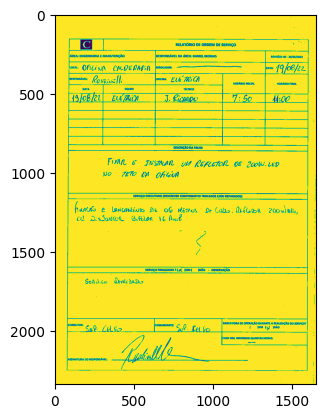

In [2]:


from Pikachu import Pikachu

#! Preparar a Imagem (Parametors aqui)
PATH_IMAGEM = r'C:\Users\PedroVictorRodrigues\Documents\GitHub\elon-musk\Tecnologia e Inovação\Visão Computacional\assets\Train Data\pagina_1.jpg'
pikachu = Pikachu(PATH_IMAGEM)

# Processando imagem
img_processada = pikachu.ProcessarImagem()
plt.imshow(img_processada)

# Extraindo texto
txt = pikachu.extrairTextoManuscrito(img_processada)
print(txt)

#### Regex

In [8]:

import re


def extrairServico(texto):
    padrao = r'\d+-\s(.*?)(?=\n\d+-|$)'
    servicos = re.findall(padrao, texto, re.DOTALL)
    return servicos

def extrairDescricaoFalha(texto):
    padrao = r'\d+-\s(.*?)(?=\n\d+-|$)'
    matches = re.finditer(padrao, texto, re.DOTALL)
    descricao_falha = ''
    for match in matches:
        descricao_falha += match.group(1) + '\n'
    return descricao_falha.strip()

def servicoExecutado(texto):
    padrao = r'HORÁNO FINAL(.*?)\n\n'
    matches = re.search(padrao, texto, re.DOTALL)
    if matches:
        servico_executado = matches.group(1).strip()
    else:
        servico_executado = ''
    return servico_executado

def formatar_nome(nome):
    parts = nome.split(" ")
    first_letters = [part[0].upper() for part in parts]
    rest = "/".join(parts[1:])
    formatted_string = "".join(first_letters) + "/" + rest
    return formatted_string


def buscar_palavra_em_linha(texto, palavra):
    linhas = texto.split('\n')
    for linha in linhas:
        if palavra in linha:
            return linha
    return None


def buscar_palavra_acima(texto, palavra):
    linhas = texto.split('\n')
    indice_palavra = None

    for i, linha in enumerate(linhas):
        if palavra in linha:
            indice_palavra = i
            break

    if indice_palavra is None or indice_palavra == 0:
        return None

    return linhas[indice_palavra - 1]


def buscar_palavra_abaixo(texto, palavra):
    linhas = texto.split('\n')
    indice_palavra = None

    try:
        for i, linha in enumerate(linhas):
            if palavra in linha:
                indice_palavra = i
                break
    except:
        print('Nao consigo fazer o Loop')

    if indice_palavra is None or indice_palavra == len(linhas) - 1:
        return None

    return linhas[indice_palavra + 1]

def acessar_elemento_por_numero(texto):
    linhas = texto.split('\n')
    elementos = {}

    for i, linha in enumerate(linhas):
        elementos[i] = linha

    return elementos


def buscar_parte_direita(texto):
    partes = texto.split(':')
    if len(partes) > 1:
        return partes[1].strip()
    return None

def extrair_data(texto):
    padrao = r'\d{2}/\d{2}/\d{2}'
    match = re.search(padrao, texto)
    if match:
        return match.group(0)
    return None

In [9]:
servicos = extrairServico(txt)
descricao_falha = extrairDescricaoFalha(txt)
servico_executado = servicoExecutado(txt)

print("Serviços:")
for servico in servicos:
    print(servico)

print("\nDescrição da Falha:")
print(descricao_falha)

print("\nServiço Executado:")
print(servico_executado)

Serviços:
20/06/2022
DATA: 19/08/22
HORÁRIO FINAL
11:00
BARCO FORA DE OPERAÇÃO DURANTE A REALIZAÇÃO DO SERVIÇO?
{}SIM ( )NÃO
CASO SIM, INFORMAR QUANTAS HORAS:
——— ———————————— --
1
-—-
|
1
I
|
1
1
I
I

Descrição da Falha:
20/06/2022
DATA: 19/08/22
HORÁRIO FINAL
11:00
BARCO FORA DE OPERAÇÃO DURANTE A REALIZAÇÃO DO SERVIÇO?
{}SIM ( )NÃO
CASO SIM, INFORMAR QUANTAS HORAS:
——— ———————————— --
1
-—-
|
1
I
|
1
1
I
I

Serviço Executado:



#### Extração por nome e numero

In [10]:

# TODO -> buscar por: Nome do Barco, Desc. Falha, Equipamento, Servico Exect., Data Inicio, Responsavel, Oficina, Finalizado?, Data Conclusao, Fora de operação?

# TODO -> Buscar o nome do equipamento na descrição da falha
# Definir as colunas do dataframe
colunas = ['Rebocador','DATA INICIAL + OFICINA', 'DESCRIÇÃO DA FALHA', 'Equipamento','SERVIÇO EXECUTADO','Data Inicio Abertura', 'Tecnicos','Oficina','Finalizado?','DATA FINAL','Fora de Operação?', 'OBS']
df = pd.DataFrame(columns=colunas)


#Procurando por Palavra
KEYWORDS = ['REBOCADOR','OFICINA','CONDUTOR:','TÉCNICO','SERVIÇO FINALIZADO','SERVIÇO EXECUTADO','EQUIPE','REVISÃO:']
i = 0

#Loop
for palavra_procurada in KEYWORDS:
    resultado_busca = buscar_palavra_em_linha(txt, palavra_procurada)
    frase_acima = buscar_palavra_acima(txt,palavra_procurada)
    frase_abaixo = buscar_palavra_abaixo(txt,palavra_procurada)
    frase_abaixo_2x = buscar_palavra_abaixo(txt,frase_abaixo)
    
    try:
        palavra_direita = buscar_parte_direita(resultado_busca)
    except:
        print('\n\nNao consigui ver a parte da direita')
    i = i + 1

    #TODO -> Procurar o X do serviço finalizado e 

    #!change here
    print(f'\n{i}) Palavra Procurada: {resultado_busca}')
    print('Frase Acima:', frase_acima)
    print('Frase Abaixo:', frase_abaixo)
    print('Palavra Direita: ',palavra_direita, '\n')
    
    #Buscndo os dados
    if palavra_procurada == 'REBOCADOR':
        print('--> REBOCADOR:', frase_acima)
        df['Rebocador'] = [frase_acima]

    elif palavra_procurada == 'EQUIPE':
        print('--> DATA INICIAL + OFICINA =', frase_abaixo)
        df['DATA INICIAL + OFICINA'] = [frase_abaixo]


    elif palavra_procurada == 'OFICINA':
        print('--> OFICINA = ', palavra_direita)
        df['Oficina'] = [palavra_direita]

    elif palavra_procurada == 'TÉCNICO':
        nomes_tecnicos = frase_abaixo + ' ' + frase_abaixo_2x
        print('--> TECNICOS = ', nomes_tecnicos)

        nomes_formatados = formatar_nome(nomes_tecnicos)

        df['Tecnicos'] = [nomes_formatados]

    elif palavra_procurada == 'CONDUTOR:':
        print('--> Data to Dataframe =', frase_acima)
        #dados.append({'Tecnicos':nomes_tecnicos})


    elif palavra_procurada == 'SERVIÇO FINALIZADO':
        print('--> DESCRIÇÃO DA FALHA =', frase_acima)

        equipamento = str(frase_acima).upper()
        if equipamento in equipamentos_array:
            print('Equipamento encontrando:', equipamento)
        else:
            print('Equipamento nao encontrado.')
            
        df['DESCRIÇÃO DA FALHA'] = [frase_acima]


    elif palavra_procurada == 'SERVIÇO EXECUTADO':
        servico_executado = frase_abaixo + ' ' +frase_abaixo_2x
        print('--> SERVIÇO EXECUTADO =', servico_executado)
        df['SERVIÇO EXECUTADO'] = [servico_executado]

    

    elif palavra_procurada == 'REVISÃO:':
        final_datetime = extrair_data(frase_abaixo)
        print('--> DATA FINAL =', final_datetime)
        df['DATA FINAL'] = [final_datetime]


df



1) Palavra Procurada: REBOCADOR:
Frase Acima: RESPONSÁVEL DA ÁREA: DANIEL MORAIS
Frase Abaixo: ASSINATURA DO RESPONSÁVEL:
Palavra Direita:   

--> REBOCADOR: RESPONSÁVEL DA ÁREA: DANIEL MORAIS

2) Palavra Procurada: LOCAL: OFICINA CALDERAPIA
Frase Acima: ÁREA: ENGENHARIA E MANUTENÇÃO
Frase Abaixo: RESPONSÁVEL: RONDINElli
Palavra Direita:  OFICINA CALDERAPIA 

--> OFICINA =  OFICINA CALDERAPIA

3) Palavra Procurada: CONDUTOR: Sup. Celso
Frase Acima: Service ItaliZAD
Frase Abaixo: RESPONSÁVEL DA ÁREA: DANIEL MORAIS
Palavra Direita:  Sup. Celso 

--> Data to Dataframe = Service ItaliZAD

4) Palavra Procurada: TÉCNICO
Frase Acima: OFICINA: ELÉTRICA
Frase Abaixo: J. Ricardo
Palavra Direita:  None 

--> TECNICOS =  J. Ricardo DESCRIÇÃO DA FALHA

5) Palavra Procurada: SERVIÇO FINALIZADO? (Ø)SIM ( )NÃO OBSERVAÇÃO
Frase Acima: Gustiull
Frase Abaixo: HORÁRIO INICIAL
Palavra Direita:  None 

--> DESCRIÇÃO DA FALHA = Gustiull


NameError: name 'equipamentos_array' is not defined

## Colocando as informações no Excel
---

In [11]:
from openpyxl import load_workbook

class CharizardSpreadSheet:
    def __init__(self, file_path):
        self.file_path = file_path
        try:
            self.wb = load_workbook(self.file_path)
            self.sheet = self.wb.worksheets[0]  # Acessa a primeira planilha (índice 0)
        except:
            print('\nArquivo Excel esta corrompido')

    def switch_sheet(self, sheet_number):
        if sheet_number < len(self.wb.worksheets):
            self.sheet = self.wb.worksheets[sheet_number]
        else:
            print(f"A planilha de número {sheet_number} não existe.")


    def get_range(self, start_cell, end_cell):
        values = []
        for row in self.sheet[start_cell:end_cell]:
            for cell in row:
                values.append(cell.value)
        return values

    def set_range(self, start_cell, end_cell, values):
        row_index = 0
        for row in self.sheet[start_cell:end_cell]:
            for cell in row:
                cell.value = values[row_index]
                row_index += 1

    def save(self):
        self.wb.save(self.file_path)
        print(f'Salvo em {self.file_path}')

    def close(self):
        self.wb.close()

    def get_coluna(self, coluna):
        values = []
        for cell in self.sheet[coluna]:
            values.append(cell.value)
        return [value for value in values if value is not None]

    def get_last_cell(self, coluna, row=1):
        cell_value = self.sheet[f"{coluna}{row}"].value
        if cell_value is None:
            return 'Fim'
        elif self.sheet[f"{coluna}{row+1}"].value is not None:
            return self.get_last_cell(coluna, row + 1)
        return f"{coluna}{row}"

    def get_row(self, row):
        values = []
        for cell in self.sheet[row]:
            values.append(cell.value)
        return [value for value in values if value is not None]

    def get_last_row(self, coluna):
        last_row = self.sheet.max_row
        for row in range(last_row, 0, -1):
            cell_value = self.sheet[f"{coluna}{row}"].value
            if cell_value is not None:
                return row
        return None

    def adicionarLinha(self, celula_referencia, dados):
        last_row = self.get_last_row(celula_referencia[0])
        if last_row is not None:
            row = last_row + 1
            for index, value in enumerate(dados):
                cell = self.sheet.cell(row=row, column=celula_referencia[1] + index)
                cell.value = value[0]  # Acessa o primeiro valor de cada sublista
                print(index, value)
                print('\n\n', cell.value)
            return row
        
    def adicionarDado(self, celula, valor):
        self.sheet[celula] = valor


file_path = r'C:\Users\PedroVictorRodrigues\elon-musk\Visão Computacional\assets\Planilhas\Acompanhamento MNT - Pequenos.xlsx'
charizard = CharizardSpreadSheet(file_path)



Arquivo Excel esta corrompido


In [12]:
dados_array = []

for coluna in df.columns:
    dados_array.append(df[coluna].to_list())
    
dados_array

[['RESPONSÁVEL DA ÁREA: DANIEL MORAIS'],
 [nan],
 [nan],
 [nan],
 [nan],
 [nan],
 ['JRDDF/Ricardo/DESCRIÇÃO/DA/FALHA'],
 ['OFICINA CALDERAPIA'],
 [nan],
 [nan],
 [nan],
 [nan]]

In [13]:
import time

ultima_linha = charizard.get_last_row('A')

COLUNAS = ['B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M']

for coluna, dados in zip(COLUNAS, dados_array):
    #Pegando a celula
    _cell = f"{coluna}{ultima_linha}"
    print(_cell)

    # Obter o valor correspondente ao índice da coluna
    item = dados[0]
    print(item)

    # Adicionar o valor na célula correspondente
    charizard.adicionarDado(_cell, item)
    time.sleep(0.5)

# Salvar e fechar o arquivo
charizard.save()
charizard.close()

AttributeError: 'CharizardSpreadSheet' object has no attribute 'sheet'

In [ ]:


# TODO -> verificar o equipamento dentro da falha

# TODO -> Verificar se o serviço foi finalizado

# TODO -> Tratamento para os nomes dos tecnicos

# TODO -> verificar se possui obs